In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
yf.pdr_override()
start_date = '2015-08-13'
end_date = '2020-06-26'
data = pdr.get_data_yahoo('GC=F', start=start_date, end=end_date)
data.reset_index(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-13,1124.300049,1124.300049,1113.000000,1115.699951,1115.699951,441
1,2015-08-14,1113.900024,1118.800049,1112.500000,1112.900024,1112.900024,908
2,2015-08-17,1113.800049,1122.000000,1113.800049,1118.599976,1118.599976,399
3,2015-08-18,1118.199951,1118.400024,1110.000000,1117.099976,1117.099976,475
4,2015-08-19,1117.000000,1134.300049,1116.800049,1128.099976,1128.099976,348


In [3]:
training_set = data.iloc[:800, 1:2].values
test_set = data.iloc[800:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


2023-05-28 18:23:32.956267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 5s 57ms/step - loss: 0.0832
Epoch 2/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0195
Epoch 3/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0160
Epoch 4/100
24/24 [==============================] - 1s 41ms/step - loss: 0.0141
Epoch 5/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0145
Epoch 6/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0155
Epoch 7/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0122
Epoch 8/100
24/24 [==============================] - 1s 45ms/step - loss: 0.0135
Epoch 9/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 1s 44ms/step - loss: 0.0113
Epoch 11/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0109
Epoch 12/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0094
Epoch 13/100
24/24 [=================

In [6]:
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 483):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

14/14 [==============================] - 1s 10ms/step


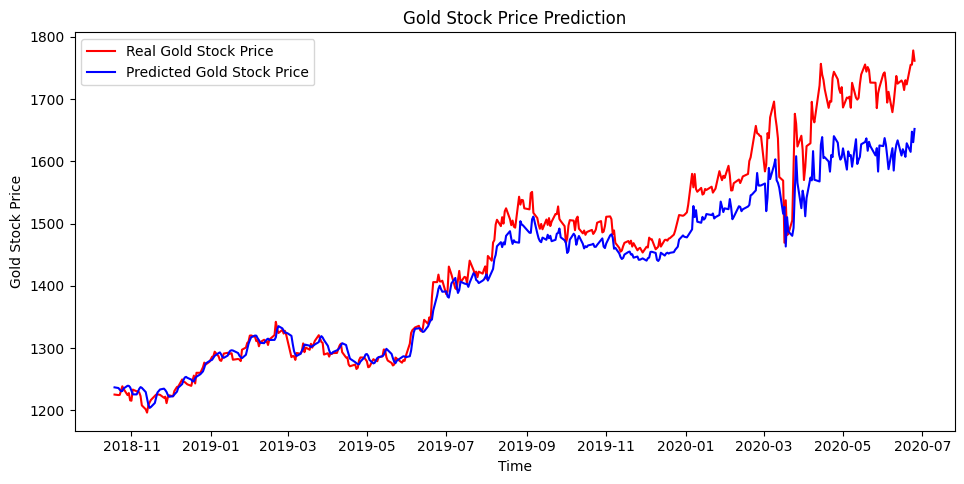

In [8]:
plt.plot(data.loc[800:, 'Date'], dataset_test.values, color = 'red', label = 'Real Gold Stock Price')
plt.plot(data.loc[800:, 'Date'], predicted_stock_price, color = 'blue', label = 'Predicted Gold Stock Price')
plt.subplots_adjust(bottom=0.05, right=1.5)
plt.title('Gold Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.legend()
plt.show()